# Lecture 10– Fall 2023

**Exploratory Data Analysis (EDA)**

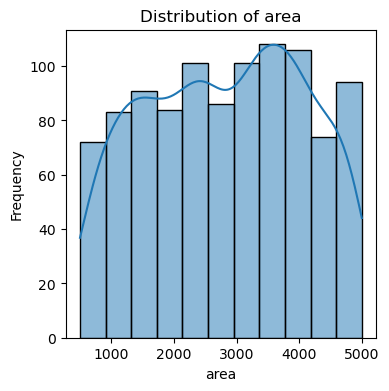

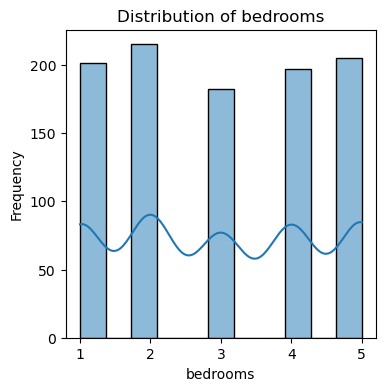

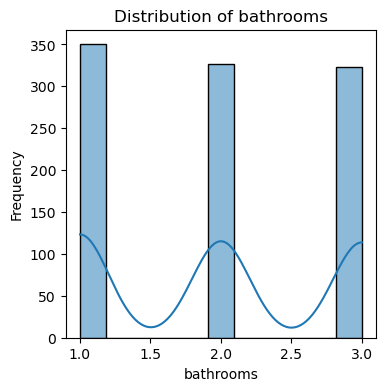

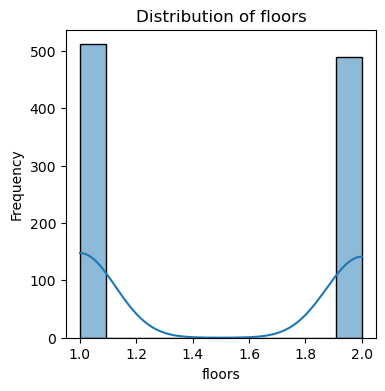

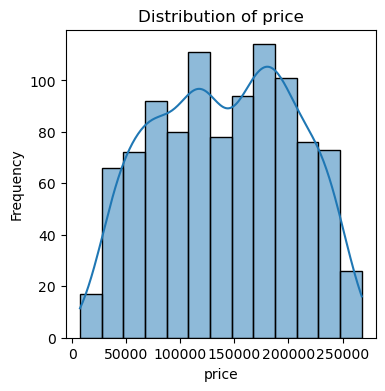

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\MOEED\Desktop\Knowledge Streams\Machine Learning/house_prices.csv")

# Display first 10 rows

df.head(10)
# Summary statistics
df.describe()
# Distribution of each feature
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(4, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Pair plots to visualize relationships between price and every other feature


# Find Correlation matrix using heatmap


C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


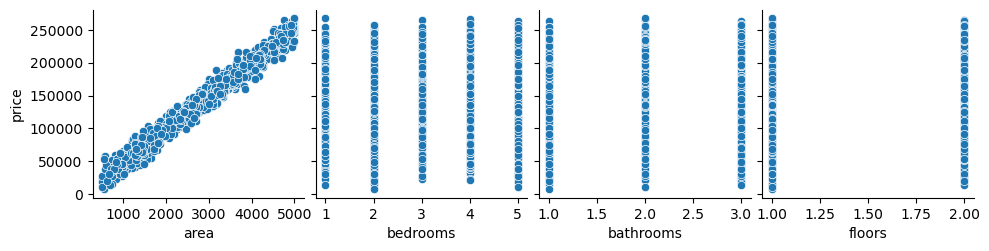

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create pair plot
sns.pairplot(numeric_df, x_vars=numeric_df.columns.drop('price'), y_vars=['price'], kind='scatter')

# Show the plot
plt.show()

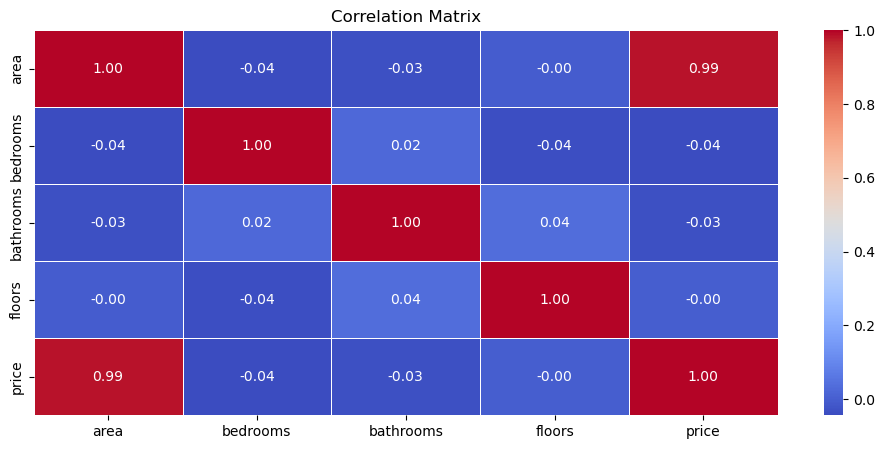

In [3]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Pre-processing & Data Wrangling**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = df.isnull().sum()
missing_values
# Feature scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
# scaler = MinMaxScaler()
# scaled_data_minmax = scaler.fit_transform(numeric_df)
# scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=numeric_df.columns)

# Standardization (Z-score normalization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(numeric_df)
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=numeric_df.columns)

# Compare original and scaled data
# print("Original Data:")
# print(numeric_df.head())
# print("\nMin-Max Scaled Data:")
# print(scaled_df_minmax.head())
print("\nStandardized Data:")
print(scaled_df_standard.head())
# Feature engineering: price per square foot

# Split data
from sklearn.model_selection import train_test_split

# Assuming df contains your dataset, including features and target variable

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)



Standardized Data:
       area  bedrooms  bathrooms    floors     price
0 -1.159803 -0.693836  -1.186699  1.022247 -1.037590
1  1.160724  0.007008   1.252559 -0.978237  0.890966
2  0.618843 -1.394681   0.032930 -0.978237  0.624711
3 -1.473776 -1.394681   0.032930  1.022247 -1.517427
4  1.681887 -0.693836  -1.186699  1.022247  1.443051
Training set - Features: (800, 4) Target: (800,)
Testing set - Features: (200, 4) Target: (200,)


**Model Building & Hyperparameter Tuning**

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Regularized models (just as examples, hyperparameters can be tuned)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

**Model Evaluation & Diagnostics**

Linear Regression Metrics:
MAE: 7755.330146621516
MSE: 93338124.83730525
RMSE: 9661.165811500456
R^2: 0.9769526240478177


C:\Users\MOEED\AppData\Local\Temp\ipykernel_9608\1535337635.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


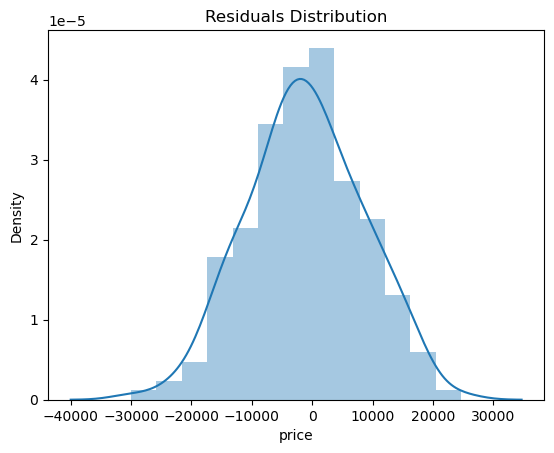

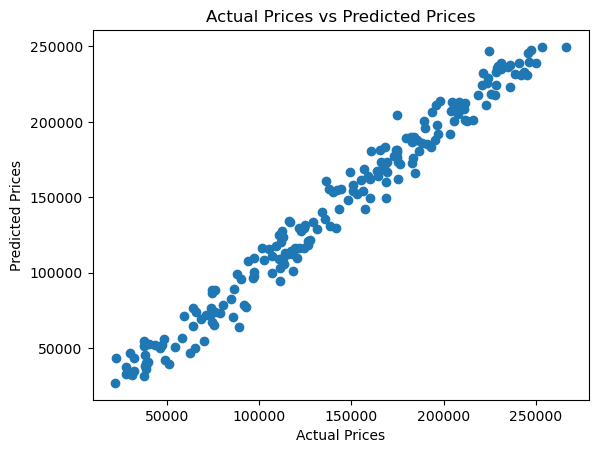

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluation metrics
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

# Residuals plot
residuals = y_test - y_pred
sns.distplot(residuals)
plt.title("Residuals Distribution")
plt.show()

# Actual vs. Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


# Example 2

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\MOEED\Desktop\Knowledge Streams\Machine Learning/ecommerce_spending.csv")

# Display the first 10 rows of the dataset
df.head(10)
# Display summary statistics
#df.describe

# Visualize spending distribution across different ages


# Plot the relationship between average time on site and total spending




,age,gender,avg_site_time,app_downloads,product_reviews,total_spent
0,62,0,54.46,3,9,148.43
1,65,0,49.82,1,6,796.40
2,18,0,54.77,2,13,105.13
3,21,0,58.61,2,3,211.68
4,21,0,40.80,2,2,494.96
5,57,1,35.63,0,8,619.49
6,27,1,36.83,3,4,627.28
7,37,0,55.30,1,10,732.69
8,39,0,24.39,5,12,328.90
9,68,0,31.89,4,4,491.14


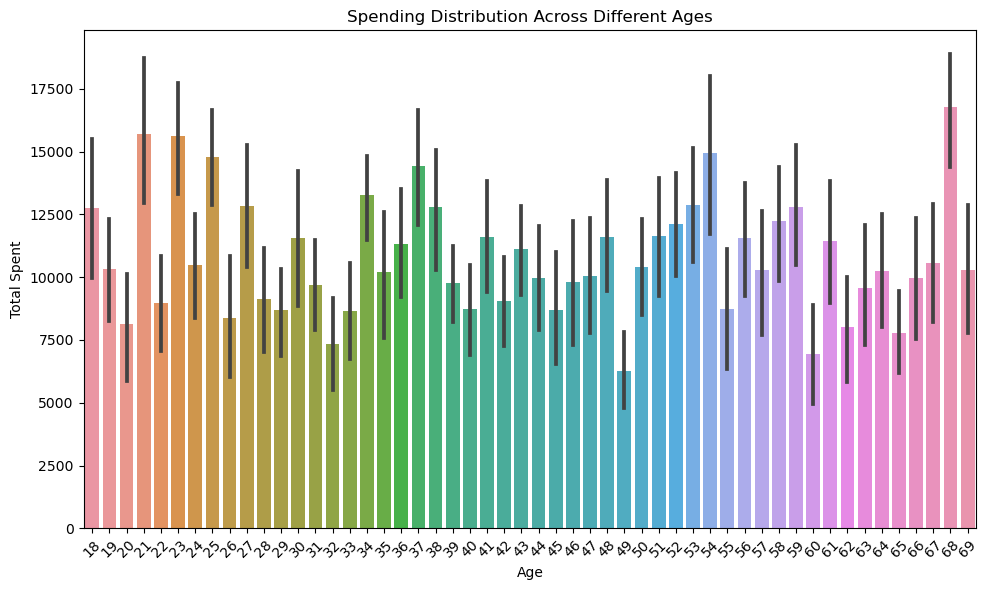

In [8]:
# Visualize spending distribution across different ages
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='total_spent', data=df, estimator=sum)
plt.title('Spending Distribution Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

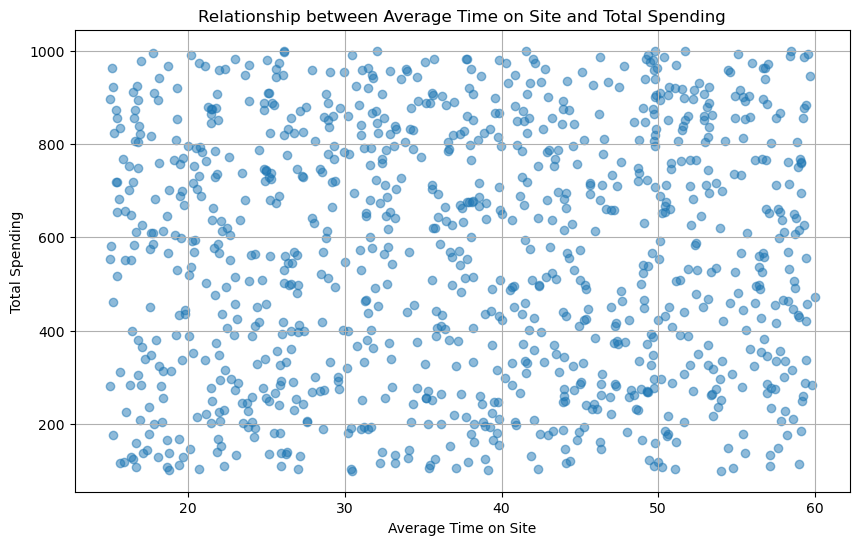

In [9]:
# Plot the relationship between average time on site and total spending
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_site_time'], df['total_spent'], alpha=0.5)
plt.title('Relationship between Average Time on Site and Total Spending')
plt.xlabel('Average Time on Site')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

**Data preprocessing or wrangling**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame

# Select numerical columns to standardize
#numerical_cols = ['age', 'avg_site_time', 'app_downloads', 'product_reviews', 'total_spent']

# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

scaled_df2 = scaler.fit_transform(df)
scaled_df2 = pd.DataFrame(scaled_df2, columns = df.columns)

# Fit the scaler to the numerical data and transform it
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
#df2 = pd.DataFrame(numerical_cols, columns = df.columns)

# Now df contains standardized numerical features

# Engineering a new feature: interaction between avg_site_time and product_reviews
df['interaction_feature'] = df['avg_site_time'] * df['product_reviews']
# Splitting the data into training and test sets
# Define features (X) and target variable (y)
X = df.drop(columns=['total_spent'])  # Features excluding the target variable
y = df['total_spent']  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test (features) and y_train, y_test (target variable) for training and testing


In [33]:
scaled_df2

,age,gender,avg_site_time,app_downloads,product_reviews,total_spent,interaction_feature
0,1.229628,-1.026347,1.293598,0.694593,1.759116,-1.553278,2.345540
1,1.426547,-1.026347,0.938705,-0.730213,0.446996,0.886853,0.417228
2,-1.658518,-1.026347,1.317309,-0.017810,3.508609,-1.716338,4.783299
3,-1.461599,-1.026347,1.611013,-0.017810,-0.865124,-1.315091,-1.466753
4,-1.461599,-1.026347,0.248805,-0.017810,-1.302498,-0.248313,-0.355414
...,...,...,...,...,...,...,...
995,0.704511,0.974329,0.192205,1.406995,0.446996,-0.518585,0.070544
996,-1.592878,-1.026347,1.395324,-0.730213,1.321742,1.291225,1.897403
997,0.245033,-1.026347,0.742902,-0.017810,-0.865124,-0.565958,-0.686464
998,-1.330319,-1.026347,1.374673,-0.730213,0.884369,-1.589355,1.244371


**Model Building**

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Regularized models (just as examples, hyperparameters can be tuned)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

**Model Evaluation**

MAE:  0.8200807594739478


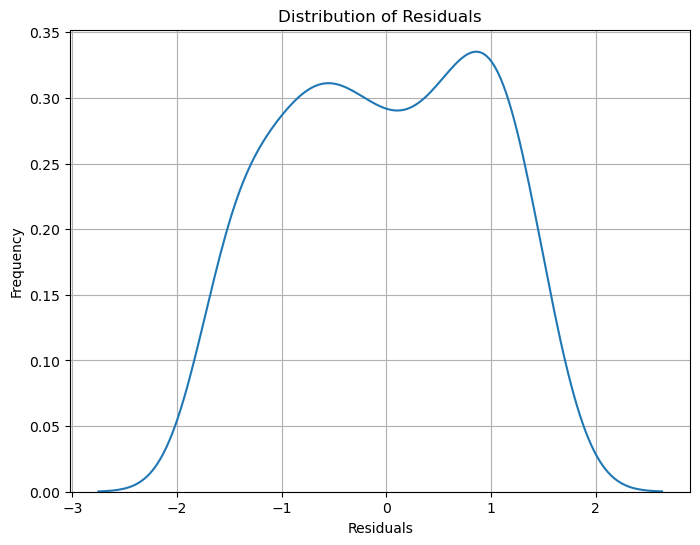

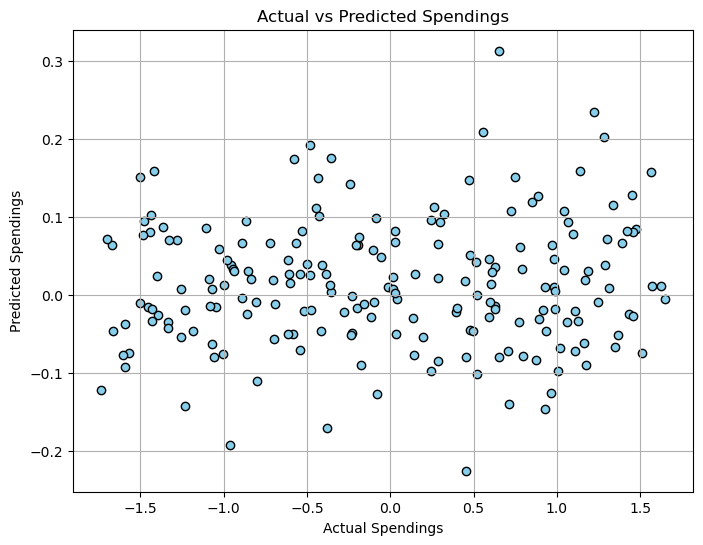

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print evaluation metrics for the model's predictions
print('MAE: ', mean_absolute_error(y_test, y_pred))

# Plot the distribution of residuals (difference between actual and predicted values)
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()
# Scatter plot to compare actual vs predicted spendings
import matplotlib.pyplot as plt

# Plot actual vs predicted spendings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='black')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # plot the diagonal line
plt.xlabel('Actual Spendings')
plt.ylabel('Predicted Spendings')
plt.title('Actual vs Predicted Spendings')
plt.grid(True)
plt.show()



In [28]:
df.columns

Index(['age', 'gender', 'avg_site_time', 'app_downloads', 'product_reviews',
       'total_spent', 'interaction_feature'],
      dtype='object')

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

Linear Regression Metrics:
MAE: 0.8200807594739478
MSE: 0.8878290061423487
RMSE: 0.9422467862202284
R^2: 0.0032318229378137664


**Conclusion**

In [37]:
# Display the coefficients of the linear regression model for interpretation
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                     Coefficient
age                    -0.020515
gender                 -0.062666
avg_site_time           0.022262
app_downloads           0.024661
product_reviews        -0.033244
interaction_feature    -0.071673
